#### arixv research 
##### tools creation 

In [2]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [3]:
#used the in build tools wikipedia
api_warpaper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=550)
wiki=WikipediaQueryRun(api_wrapper=api_warpaper_wiki)

In [4]:
wiki.name

'wikipedia'

In [5]:
api_warpaper_arixv=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=550)
arixv=ArxivQueryRun(api_wrapper=api_warpaper_arixv)

In [21]:
tools=[wiki,arixv]

### custom tools


In [10]:
import os
from dotenv import load_dotenv
load_dotenv
os.environ["HF_TOKEM"]=os.getenv("HF_TOKEN")

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [8]:
# Custom tools
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS

from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [12]:
loader=WebBaseLoader("https://docs.smith.langchain.com/")
docs=loader.load()
documents=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200).split_documents(docs)
vectordb=FAISS.from_documents(documents,embedding=embeddings)
retriever=vectordb.as_retriever()
retriever

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000270942A2020>, search_kwargs={})

In [17]:
from langchain_core.tools import Tool

def retriever_search(query: str):
    docs = retriever.get_relevant_documents(query)
    return "\n".join([d.page_content for d in docs])

retriever_tool = Tool(
    name="retriever_search",
    description="Searches documents using the retriever",
    func=retriever_search
)


In [23]:
retriever_tool.name

'retriever_search'

### run the tools with agents and llm models
agentexecutor

In [25]:
groq_api=os.getenv("GROK_API_KEY")
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama-3.1-8b-instant",groq_api_key=groq_api)

In [26]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000270944955D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000270997F3940>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [62]:
from langchain_core.prompts import ChatPromptTemplate


prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant."),
    ("placeholder", "{messages}")
])
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant.'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='messages', optional=True)]

C:\Users\kiran\AppData\Local\Temp\ipykernel_23900\1399614295.py:3: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent = create_react_agent(


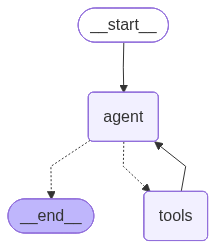

In [75]:
from langgraph.prebuilt import create_react_agent

agent = create_react_agent(
    model=llm,
    tools=tools,
    prompt=prompt
)
agent


In [63]:
from langgraph.prebuilt.chat_agent_executor import create_tool_calling_executor

executor = create_tool_calling_executor(model=llm,tools=tools,prompt=prompt)


C:\Users\kiran\AppData\Local\Temp\ipykernel_23900\2218208980.py:3: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  executor = create_tool_calling_executor(model=llm,tools=tools,prompt=prompt)


In [65]:
response = executor.invoke({"messages": ["what is the langraph!"]})
print(response)


{'messages': [HumanMessage(content='what is the langraph!', additional_kwargs={}, response_metadata={}, id='a09b8a54-3277-467d-a908-60d000b41198'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'jhr9b3v9q', 'function': {'arguments': '{"query":"langraph"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 442, 'total_tokens': 457, 'completion_time': 0.014693888, 'prompt_time': 0.024899128, 'queue_time': 0.053480712, 'total_time': 0.039593016}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--ce8b597c-5763-404b-bc46-e1f63470971f-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'langraph'}, 'id': 'jhr9b3v9q', 'type': 'tool_call'}], usage_metadata={'input_tokens': 442, 'output_tokens': 15, 'total_tokens': 457}), ToolMessage(content='Page: List of After

In [70]:
response = executor.invoke({"messages": ["what is the machine learning"]})
print(response["messages"][-1].content)


language processing, image recognition, and game playing, among others.


In [69]:
executor.invoke({"messages": ["what is the machine learning"]})

{'messages': [HumanMessage(content='what is the machine learning', additional_kwargs={}, response_metadata={}, id='238a0407-509b-4c17-a952-eb819c748fb7'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '95ffx9scy', 'function': {'arguments': '{"query":"machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 441, 'total_tokens': 456, 'completion_time': 0.0176604, 'prompt_time': 0.02445503, 'queue_time': 0.05006993, 'total_time': 0.04211543}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--e8d2c9f9-ae49-4929-898d-6adbc53f326d-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'machine learning'}, 'id': '95ffx9scy', 'type': 'tool_call'}], usage_metadata={'input_tokens': 441, 'output_tokens': 15, 'total_tokens': 456}),
  ToolMessage(conten

In [72]:
state = executor.invoke({"messages": ["what is there in the paper 1706.03762 about?"]})

msg = state["messages"][-1]

# If it’s a dict, get 'content'
if isinstance(msg, dict):
    print(msg.get("content"))
else:
    print(msg.content)


c:\Users\kiran\miniconda3\envs\venv_rating\lib\site-packages\langchain_community\utilities\arxiv.py:102: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  ).results()
c:\Users\kiran\miniconda3\envs\venv_rating\lib\site-packages\langchain_community\utilities\arxiv.py:102: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  ).results()


No further calls needed.


In [73]:
msg

AIMessage(content='No further calls needed.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 6, 'prompt_tokens': 1657, 'total_tokens': 1663, 'completion_time': 0.019958138, 'prompt_time': 0.078148898, 'queue_time': 0.047799552, 'total_time': 0.098107036, 'prompt_tokens_details': {'cached_tokens': 1024}}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--6aa54b63-260f-4b84-b04d-aeb24730c229-0', usage_metadata={'input_tokens': 1657, 'output_tokens': 6, 'total_tokens': 1663, 'input_token_details': {'cache_read': 1024}})